# SOWNDARIYA M 
## PGAA 02

# AIM:


##      TO PREDICT THE MOVIE RATING OF RESTAURANTS IN BANGALORE DEPENDS ON REVIEW TEXT

# OVERVIEW:

#### 1.IMPORTING LIBRARIES

#### 2.LOADING DATASET

#### 3.FEATURE ENGINEERING(FOR GIVING INSIGHTS TO THE BUSINESS)

#### 4.EXPLORATORY DATA ANALYSIS

#### 5.USED NLP TECHNIQUES :
    1. Tokenization - Splitting the senctence into words and making single entities of it
    2. Cleaning Text - Removing words that don't have significance such as "and,the,is,am,are" and then converting to lower        case and then using Regular Expressions to filter words
    3. Stemming - Converting each word to its root word is called stemming. For example "go, going, gone" have same root         word "go".
    4. Bag of Words - Converts group of words into a matrix, showing each words frequency
    5. Count Vectorizer
    6. TF-IDF - Term Frequency-Inverse Document Frequency, forms a matrix and shows TF-IDF of each words
    
#### 6.TARGET VARIABLE VISUALISATION - IMBALANCED

#### 7.LABEL ENCODING -  TARGET VARIABLE

#### 7.TRAIN TEST SPLIT

#### 8.MODEL BUILDING USING LOGISTIC, RANDOM FOREST, XGB CLASSSIFIER, MULTINOMIAL NB( LOGISTIC GAVE BETTER ACCURACY THAN OTHERS)

#### 9.HANDLING IMBALANCED DATASET USING OVERSAMPLING TECHNIQUE USING RANDOM OVERSAMPLER

#### 10.MODEL BUILDING WITH BALANCED DATASET USING LOGISTIC, RANDOM FOREST, XGB CLASSSIFIER, MULTINOMIAL NB(RANDOM FOREST CLASSIFIER GAVE BETTER ACCURACY THAN OTHERS)

#### 11.TEST DATA - DONE SAME DATA PROCESSING TECHNIQUES

#### 12.USED RANDOM FOREST CLASSIFIER TO PREDICT THE RATING

#### 13.CREATED DATAFRAME WITH REVIEW TEXT AND PREDICTED RATING

#### 14.EXPORTED AS CSV

## IMPORTING LIBRARIES

In [1]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')



from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowndariya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## LOADING DATA

In [4]:
df = pd.read_excel('Foodie_Community_Train.xlsx')

<IPython.core.display.Javascript object>

In [5]:
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00,0
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00,0
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00,0
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00,3
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:50:00,0


In [6]:
# CHECKING DATATYPES, NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Restaurant_Name      6400 non-null   object        
 1   Reviewer_Name        6400 non-null   object        
 2   Review_Text          6396 non-null   object        
 3   Rating(1 - 5)        6400 non-null   object        
 4   Reviews & Followers  6400 non-null   object        
 5   Time                 6400 non-null   datetime64[ns]
 6   Pictures_uploaded    6400 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 350.1+ KB


### Comment:
+ we can observe that Review_Text having 4 null values

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pictures_uploaded,6400.0,0.718594,2.437472,0.0,0.0,0.0,0.0,52.0


In [8]:
df.dtypes

Restaurant_Name                object
Reviewer_Name                  object
Review_Text                    object
Rating(1 - 5)                  object
Reviews & Followers            object
Time                   datetime64[ns]
Pictures_uploaded               int64
dtype: object

In [9]:
# checking unique value of review and followers and their counts
df['Reviews & Followers'].value_counts()

1 Review                       600
1 Review , 1 Follower          473
2 Reviews , 1 Follower         217
2 Reviews                      171
1 Review , 2 Followers         144
                              ... 
49 Reviews , 1317 Followers      1
18 Reviews , 4 Followers         1
29 Reviews , 8 Followers         1
61 Reviews , 274 Followers       1
21 Reviews , 555 Followers       1
Name: Reviews & Followers, Length: 1884, dtype: int64

In [10]:
# to seperate reviews and followers as seperate columns checking no of observation having 1 review alone
df1 = df[df['Reviews & Followers']=='1 Review']
df1.shape

(600, 7)

In [11]:
# checking observations not having 1 review alone
df2 = df[df['Reviews & Followers']!='1 Review']
df2.shape

(5800, 7)

In [12]:
# verifying the sum of no of 1 review and more than 1 review is equal to the total observations
(df1.shape[0]+df2.shape[0]) == df.shape[0]

True

In [13]:
# To Seperating Reviews and followers from Reviews and Followers split it by ' '
df['review'] = df['Reviews & Followers'].apply(lambda x : x.split(' '))
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded,review
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00,0,"[1, Review]"
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00,0,"[8, Reviews, ,, 4, Followers]"
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00,0,"[1, Review, ,, 1, Follower]"
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00,3,"[36, Reviews, ,, 2045, Followers]"
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:50:00,0,"[1, Review, ,, 6, Followers]"


In [14]:
# Seperating Followers from Reviews and Followers
df['Followers'] =  df['review'].apply(lambda x: x[-2] if len(x)>2 else 0 )
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded,review,Followers
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00,0,"[1, Review]",0
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00,0,"[8, Reviews, ,, 4, Followers]",4
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00,0,"[1, Review, ,, 1, Follower]",1
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00,3,"[36, Reviews, ,, 2045, Followers]",2045
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:50:00,0,"[1, Review, ,, 6, Followers]",6


In [15]:
# Seperating Reviews from Reviews and Followers
df['Reviews'] =  df['review'].apply(lambda x: x[0])
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Reviews & Followers,Time,Pictures_uploaded,review,Followers,Reviews
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4,1 Review,2019-05-18 01:35:00,0,"[1, Review]",0,1
1,Dine O China,Swarn Lata Singh,poor quality,2,"8 Reviews , 4 Followers",2018-08-11 14:44:00,0,"[8, Reviews, ,, 4, Followers]",4,8
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1,"1 Review , 1 Follower",2018-10-02 14:40:00,0,"[1, Review, ,, 1, Follower]",1,1
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5,"36 Reviews , 2045 Followers",2018-08-18 23:20:00,3,"[36, Reviews, ,, 2045, Followers]",2045,36
4,KFC,Umesh Gopu,worst,1,"1 Review , 6 Followers",2018-07-25 20:50:00,0,"[1, Review, ,, 6, Followers]",6,1


In [16]:
# count of review should be in the dtype of int, so converting dtype from object to int
df['Reviews'] = df['Reviews'].astype(int)

In [17]:
# count of followers should be in the dtype of int, so converting dtype from object to int
df['Followers'] = df['Followers'].astype(int)

In [18]:
# we extract the features review and followers, so dropping source features
df.drop(['Reviews & Followers','review'], axis = 1 , inplace = True)

In [19]:
# Target column - rating of the restaurant which containing 1 string value 'like' replace that with mode
df['Rating(1 - 5)'].replace('Like',df['Rating(1 - 5)'].mode()[0], inplace = True)

## FEATURE ENGINEERING

In [20]:
# extract various date time components as seperate features
df = df.assign(hour = df.Time.dt.hour, 
                         day = df.Time.dt.day,
                        month = df.Time.dt.month, 
                        year = df.Time.dt.year, 
                        dayofweek = df.Time.dt.dayofweek)

In [21]:
# dropping source column
df.drop('Time', axis = 1, inplace = True)

In [22]:
# extracting new feature meal_of_the_day from hour
def func(x):
    if x>=6 and x<=9:
        return 'breakfast'
    elif x>9 and x<12:
        return 'brunch'
    elif x>=12 and x<=15:
        return 'lunch'
    elif x>15 and x<=18:
        return 'snacks'
    elif x>18 and x<=19:
        return 'supper'
    else:
        return 'dinner'

In [23]:
df['meal_of_the_day'] = df['hour'].apply(func)
df.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Rating(1 - 5),Pictures_uploaded,Followers,Reviews,hour,day,month,year,dayofweek,meal_of_the_day
0,Tiki Shack,Priya,"The place was good, ambiance was very nice! Mu...",4.0,0,0,1,1,18,5,2019,5,dinner
1,Dine O China,Swarn Lata Singh,poor quality,2.0,0,4,8,14,11,8,2018,5,lunch
2,Hotel Zara Hi-Fi,Samadhan Pawar,Worst experience with delivery time.. It took ...,1.0,0,1,1,14,2,10,2018,1,lunch
3,Driven Cafe,Tanvi Naik/ Taste.a.licious,What's not to love here ... The best and the m...,5.0,3,2045,36,23,18,8,2018,5,dinner
4,KFC,Umesh Gopu,worst,1.0,0,6,1,20,25,7,2018,2,dinner


In [24]:
# Dropping irrelevant columns
df.drop(['Restaurant_Name','Reviewer_Name','hour'], axis=1, inplace = True)

In [25]:
# checking no of unique values in each feature
df.nunique()

Review_Text          6047
Rating(1 - 5)           9
Pictures_uploaded      33
Followers             611
Reviews               211
day                    31
month                  12
year                    4
dayofweek               7
meal_of_the_day         6
dtype: int64

In [26]:
#checking null values
df.isnull().sum()/df.shape[0]

Review_Text          0.000625
Rating(1 - 5)        0.000000
Pictures_uploaded    0.000000
Followers            0.000000
Reviews              0.000000
day                  0.000000
month                0.000000
year                 0.000000
dayofweek            0.000000
meal_of_the_day      0.000000
dtype: float64

<IPython.core.display.Javascript object>

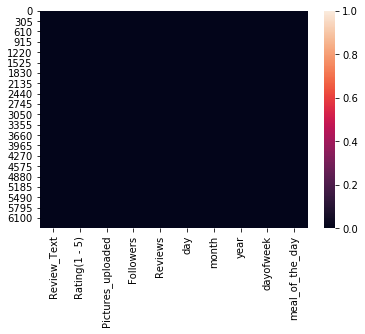

In [27]:
# checking null values by visualising
sns.heatmap(df.isnull())

### Comment :
+ we can see that there is no null values.

# EXPLORATORY DATA ANALYSIS

<IPython.core.display.Javascript object>

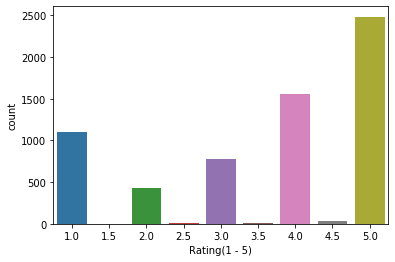

In [28]:
# visualising the target variable
sns.countplot(df['Rating(1 - 5)'])

### Comment :
+ we can observe that restaurants having rating '5'

In [29]:
df.columns

Index(['Review_Text', 'Rating(1 - 5)', 'Pictures_uploaded', 'Followers',
       'Reviews', 'day', 'month', 'year', 'dayofweek', 'meal_of_the_day'],
      dtype='object')

<IPython.core.display.Javascript object>

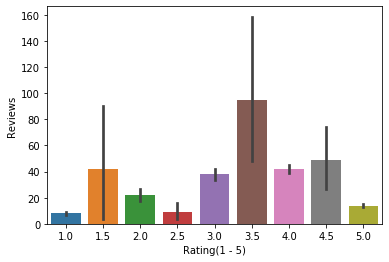

In [30]:
# visualising the target variable
sns.barplot(df['Rating(1 - 5)'],df['Reviews'])

### Comment :
+ we can say that restaurants having 3.5 rating received more reviews.

<IPython.core.display.Javascript object>

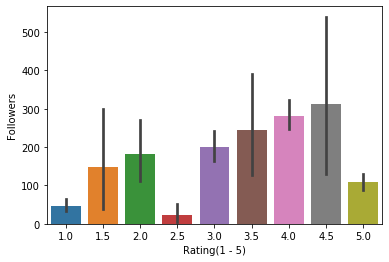

In [31]:
sns.barplot(df['Rating(1 - 5)'],df['Followers'])

### Comment :
+ we can observe that Number of followers more for the restaurant having 4.5 rating.

In [32]:
# checking the column names
df.columns

Index(['Review_Text', 'Rating(1 - 5)', 'Pictures_uploaded', 'Followers',
       'Reviews', 'day', 'month', 'year', 'dayofweek', 'meal_of_the_day'],
      dtype='object')

In [33]:
# seperating categorical columns 
df_cat = df.select_dtypes('object')

In [34]:
# seperating numerical columns 
df_num = df.select_dtypes(np.number)

<IPython.core.display.Javascript object>

In [35]:
df_cat.columns

Index(['Review_Text', 'meal_of_the_day'], dtype='object')

In [36]:
# dropping review text which is independent variable 
df_cat.drop(['Review_Text'], axis = 1, inplace = True)

C:\Users\sowndariya\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df_cat.columns

Index(['meal_of_the_day'], dtype='object')

<IPython.core.display.Javascript object>

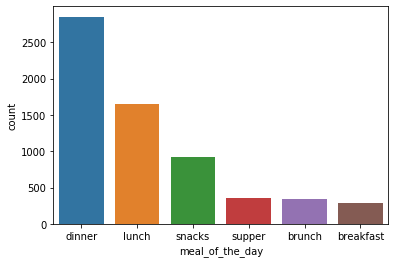

In [38]:
# visualising the meal of the day feature
sns.countplot(df['meal_of_the_day'])

### Comment :
+ Peoples gave reviews for dinner mostly and then lunch compared to others.

In [39]:
# checking the numerical column names
df_num.columns

Index(['Rating(1 - 5)', 'Pictures_uploaded', 'Followers', 'Reviews', 'day',
       'month', 'year', 'dayofweek'],
      dtype='object')

<IPython.core.display.Javascript object>

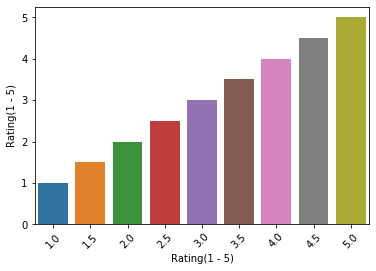

<IPython.core.display.Javascript object>

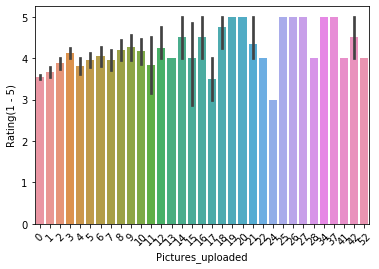

<IPython.core.display.Javascript object>

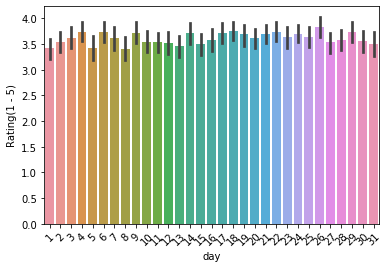

<IPython.core.display.Javascript object>

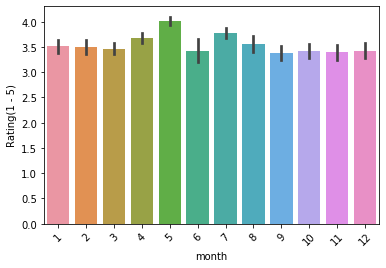

<IPython.core.display.Javascript object>

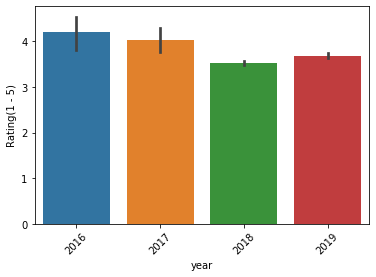

<IPython.core.display.Javascript object>

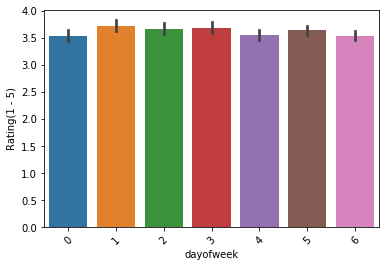

In [40]:
for i in df_num.columns:
    if ((i=='Followers') | (i=='Reviews')):
        continue
    else:
        sns.barplot(df_num[i],df['Rating(1 - 5)'])
        plt.xticks(rotation= 45)
        plt.show()


### Comments:
#### we can observe the followings from the above plot:
+ If Restaurants having more pictures uploaded then their ratings also good.
+ Restaurants got good ratings in second half of month than first half of month.
+ Mid month of a year, restaurants got good ratings compared to others.
+ In 2016 and 2017, restaurant got good ratings compared to 2018 and 2019.
    

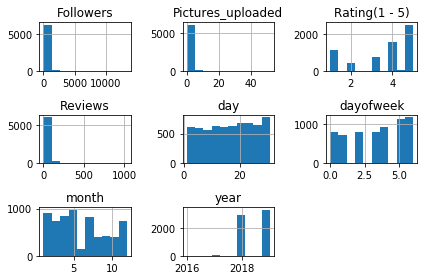

In [41]:
# checking distributions
df_num.hist()
plt.tight_layout()

In [42]:
# our aim is to predict the rating of restaurant by the reviews so just filter that two columns seperately.
dff = df[['Review_Text', 'Rating(1 - 5)']]

In [43]:
dff.head()

,Review_Text,Rating(1 - 5)
0,"The place was good, ambiance was very nice! Mu...",4.0
1,poor quality,2.0
2,Worst experience with delivery time.. It took ...,1.0
3,What's not to love here ... The best and the m...,5.0
4,worst,1.0


In [44]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Review_Text    6396 non-null   object 
 1   Rating(1 - 5)  6400 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.1+ KB


# NLP TECHNIQUES

In [45]:
# Data Preprocessing
dff['sentence_lower'] = dff["Review_Text"].str.lower() # converting text into lower
dff['sentence_no_punctuation'] = dff['sentence_lower'].str.replace('[^\w\s]','')# replace white and non white space characters by ''
dff['sentence_no_punctuation'] = dff["sentence_no_punctuation"].fillna("fillna")# replace null values by fillna

C:\Users\sowndariya\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sowndariya\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sowndariya\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [46]:
dff.head()

,Review_Text,Rating(1 - 5),sentence_lower,sentence_no_punctuation
0,"The place was good, ambiance was very nice! Mu...",4.0,"the place was good, ambiance was very nice! mu...",the place was good ambiance was very nice musi...
1,poor quality,2.0,poor quality,poor quality
2,Worst experience with delivery time.. It took ...,1.0,worst experience with delivery time.. it took ...,worst experience with delivery time it took 2 ...
3,What's not to love here ... The best and the m...,5.0,what's not to love here ... the best and the m...,whats not to love here the best and the most ...
4,worst,1.0,worst,worst


In [47]:
# Initialize empty array 
# to append clean text  
corpus = []
for i in range(0, len(df)):
    #review = re.sub('[^a-zA-Z]',' ',dff['sentence_no_punctuation'][i])# getting alphabets only and eliminating others
    #review = review.lower()# convert into lower letters
    review = dff['sentence_no_punctuation'][i].split()# splitting sentences
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]# removing stop words
    review = ' '.join(review)
    corpus.append(review)

In [48]:
# vectorize the words in corpus using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x = cv.fit_transform(corpus).toarray()
x.shape

(6400, 11531)

In [49]:
# using tfidf for giving weight to the words depends on their no of occurences
tfidf = TfidfTransformer()
X = tfidf.fit_transform(x)
X = tfidf.transform(x)

In [50]:
X.shape

(6400, 11531)

In [51]:
X

<6400x11531 sparse matrix of type '<class 'numpy.float64'>'
	with 149118 stored elements in Compressed Sparse Row format>

#### label encoding the categorical variable
from sklearn.preprocessing import LabelEncoder
fit = LabelEncoder()
df_cat['meal_of_the_day'] = fit.fit_transform(df_cat['meal_of_the_day'])

df_cat.head()

df_final = pd.concat([df_cat,df_num], axis =1)
df_final.head()

##### standardisation
from sklearn.preprocessing import Normalizer
fit = Normalizer()
df_final[df_final.columns] = fit.fit_transform(df_final)

df_final.head()

import scipy.sparse

spar = pd.DataFrame.sparse.from_spmatrix(X) # X output of tf-idf
spar.head()

In [52]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (6400, 11531)
Amount of Non-Zero occurrences:  149118
Density: 0.20206129130170844


indep = pd.concat([spar,df_final], axis =1)

pd.set_option('display.max_columns',20000)

aa = indep.head()

aa.dtypes

In [53]:
dff['Rating(1 - 5)'].value_counts()

5.0    2483
4.0    1559
1.0    1106
3.0     774
2.0     425
4.5      29
3.5      15
2.5       6
1.5       3
Name: Rating(1 - 5), dtype: int64

In [54]:
dff.dtypes

Review_Text                 object
Rating(1 - 5)              float64
sentence_lower              object
sentence_no_punctuation     object
dtype: object

In [55]:
# Label encoding the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dff['Rating(1 - 5)'])

In [56]:
list(label_encoder.classes_)

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [57]:
yy = pd.DataFrame(y)

<IPython.core.display.Javascript object>

In [58]:
yy.columns = ['a']

In [59]:
yy['a'].value_counts() # checking unique target variables after encoding

8    2483
6    1559
0    1106
4     774
2     425
7      29
5      15
3       6
1       3
Name: a, dtype: int64

In [60]:
dff['Rating(1 - 5)'].unique() # unique target variables before encoding

array([4. , 2. , 1. , 5. , 3. , 3.5, 4.5, 2.5, 1.5])

In [61]:
y

array([6, 2, 0, ..., 0, 8, 2], dtype=int64)

# TARGET VARIABLE VISUALISATION

<IPython.core.display.Javascript object>

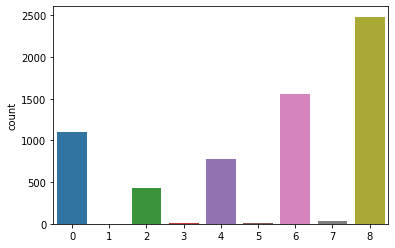

In [62]:
sns.countplot(y)# checking whether it is imbalanced or balanced dataset

### comment:
+ we can conclude that the given data is imbalanced.

## BASE MODEL

In [63]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [64]:
# import libraries for building model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

#metrics evaluation
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score


In [65]:
#Creating Result Tabulation
result_tab=pd.DataFrame(columns=['Model_name','Model'])

<IPython.core.display.Javascript object>

In [66]:
#Building models and evaluating metrics

models=[LogisticRegression(multi_class='ovr'),MultinomialNB(), RandomForestClassifier(), XGBClassifier()]

def func(model_name):
    for i in models:
        
        global result_tab
        
        print(str(i).upper())
        print()
        
        method=i
        method.fit(x_train,y_train)
        y_pred=method.predict(x_test)
        
        pred_prob1 = method.predict_proba(x_test)
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1,average='weighted',multi_class='ovr'),
                    'Precision Score': metrics.precision_score(y_test, y_pred,average = 'weighted'),
                    'Recall Score': metrics.recall_score(y_test, y_pred, average = 'weighted'),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred,average = 'weighted'),
                    "accuracy_score": accuracy_score(y_pred,y_test),
                   "confusion matrix":confusion_matrix(y_pred,y_test)})
                    #'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    #'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab=result_tab.append(modd,ignore_index=True)
        
    return result_tab


LOGISTICREGRESSION(MULTI_CLASS='OVR')



C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


classification report:                  precision    recall  f1-score   support

           0       0.83      0.63      0.72       272
           1       0.00      0.00      0.00         0
           2       0.02      0.20      0.04        10
           3       0.00      0.00      0.00         0
           4       0.13      0.46      0.20        50
           5       0.00      0.00      0.00         0
           6       0.46      0.47      0.46       288
           7       0.00      0.00      0.00         0
           8       0.88      0.67      0.76       660

    accuracy                           0.60      1280
   macro avg       0.26      0.27      0.24      1280
weighted avg       0.74      0.60      0.66      1280

PPV:  100.0
NPV:  0.0


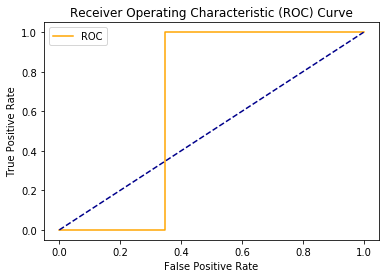

<IPython.core.display.Javascript object>

MULTINOMIALNB()

classification report:                  precision    recall  f1-score   support

           0       0.54      0.72      0.62       155
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.35      0.35      0.35       297
           7       0.00      0.00      0.00         0
           8       0.94      0.57      0.71       828

    accuracy                           0.53      1280
   macro avg       0.20      0.18      0.19      1280
weighted avg       0.75      0.53      0.61      1280

PPV:  100.0
NPV:  0.0


C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_clas

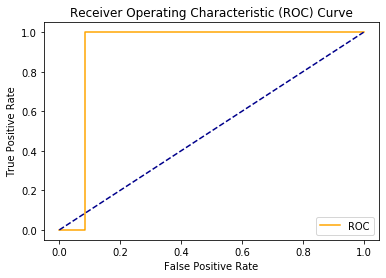

<IPython.core.display.Javascript object>

RANDOMFORESTCLASSIFIER()



C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_clas

classification report:                  precision    recall  f1-score   support

           0       0.84      0.64      0.73       269
           1       0.00      0.00      0.00         0
           2       0.02      0.18      0.04        11
           3       0.00      0.00      0.00         0
           4       0.07      0.63      0.12        19
           5       0.00      0.00      0.00         0
           6       0.39      0.43      0.41       265
           7       0.00      0.00      0.00         0
           8       0.90      0.62      0.74       716

    accuracy                           0.58      1280
   macro avg       0.25      0.28      0.23      1280
weighted avg       0.76      0.58      0.65      1280

PPV:  100.0
NPV:  0.0


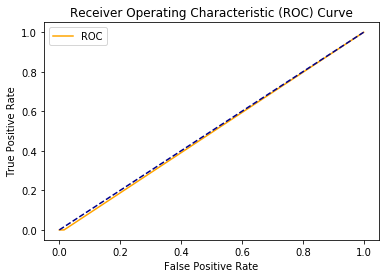

<IPython.core.display.Javascript object>

XGBCLASSIFIER(BASE_SCORE=NONE, BOOSTER=NONE, COLSAMPLE_BYLEVEL=NONE,
              COLSAMPLE_BYNODE=NONE, COLSAMPLE_BYTREE=NONE, GAMMA=NONE,
              GPU_ID=NONE, IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=NONE, MAX_DELTA_STEP=NONE, MAX_DEPTH=NONE,
              MIN_CHILD_WEIGHT=NONE, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=NONE, NUM_PARALLEL_TREE=NONE,
              RANDOM_STATE=NONE, REG_ALPHA=NONE, REG_LAMBDA=NONE,
              SCALE_POS_WEIGHT=NONE, SUBSAMPLE=NONE, TREE_METHOD=NONE,
              VALIDATE_PARAMETERS=FALSE, VERBOSITY=NONE)



C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_clas

classification report:                  precision    recall  f1-score   support

           0       0.74      0.64      0.69       239
           1       0.00      0.00      0.00         0
           2       0.04      0.13      0.07        30
           3       0.00      0.00      0.00         0
           4       0.22      0.45      0.30        88
           5       0.00      0.00      0.00         1
           6       0.46      0.43      0.45       317
           7       0.00      0.00      0.00         0
           8       0.82      0.68      0.74       605

    accuracy                           0.58      1280
   macro avg       0.25      0.26      0.25      1280
weighted avg       0.66      0.58      0.61      1280

PPV:  100.0
NPV:  0.0


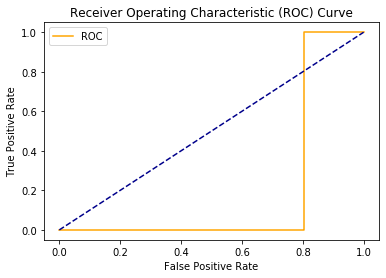

<IPython.core.display.Javascript object>

C:\Users\sowndariya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.838778,0.583594,0.403423,0.547572,0.583594,0.583594,"[[173, 1, 43, 1, 37, 1, 7, 0, 6], [0, 0, 0, 0,...",0.516560
3,base,"XGBClassifier(base_score=0.5, booster=None, co...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481


In [67]:
func('base')

In [68]:
result_tab

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.838778,0.583594,0.403423,0.547572,0.583594,0.583594,"[[173, 1, 43, 1, 37, 1, 7, 0, 6], [0, 0, 0, 0,...",0.516560
3,base,"XGBClassifier(base_score=0.5, booster=None, co...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481


## Comment:
+ we can conclude that LogisticRegression gave better accuracy compared to others.

# HANDLING IMBALANCED DATASET USING OVERSAMPLING TECHNIQUE

In [69]:
X.shape

(6400, 11531)

In [70]:
y.shape

(6400,)

In [71]:
# Using Random Over sampler to make the dataset balanced.
from imblearn.over_sampling import RandomOverSampler
fit_ov = RandomOverSampler()
x_re, y_re = fit_ov.fit_resample(X,y)

In [72]:
x_re.shape

(22347, 11531)

In [73]:
y_re.shape


(22347,)

<IPython.core.display.Javascript object>

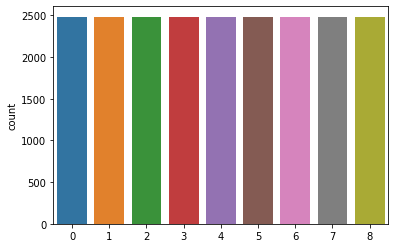

In [74]:
# visualizing target variable after used oversampling technique
sns.countplot(y_re)

### Comment:
+ we can see that every classes having same number of samples.1

In [75]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_re,y_re,test_size=0.2,random_state=1)

LOGISTICREGRESSION(MULTI_CLASS='OVR')

classification report:                  precision    recall  f1-score   support

           0       0.86      0.83      0.84       532
           1       1.00      1.00      1.00       489
           2       0.86      0.81      0.84       513
           3       1.00      1.00      1.00       491
           4       0.75      0.81      0.78       490
           5       1.00      0.99      0.99       493
           6       0.63      0.68      0.65       441
           7       1.00      0.98      0.99       507
           8       0.77      0.75      0.76       514

    accuracy                           0.87      4470
   macro avg       0.87      0.87      0.87      4470
weighted avg       0.88      0.87      0.88      4470

PPV:  100.0
NPV:  100.0


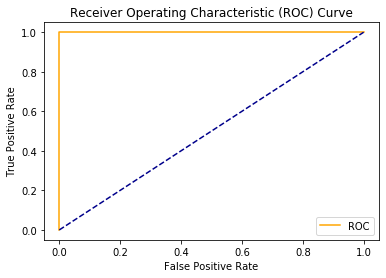

<IPython.core.display.Javascript object>

MULTINOMIALNB()

classification report:                  precision    recall  f1-score   support

           0       0.77      0.86      0.81       459
           1       1.00      0.97      0.98       506
           2       0.83      0.74      0.78       550
           3       1.00      0.95      0.98       516
           4       0.71      0.84      0.77       449
           5       1.00      0.95      0.97       514
           6       0.77      0.61      0.68       597
           7       1.00      0.96      0.98       519
           8       0.59      0.83      0.69       360

    accuracy                           0.85      4470
   macro avg       0.85      0.86      0.85      4470
weighted avg       0.86      0.85      0.85      4470

PPV:  98.5
NPV:  100.0


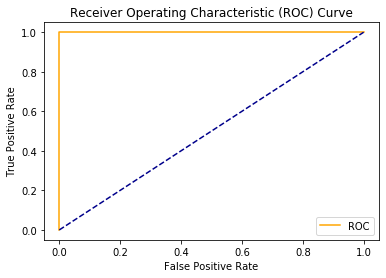

<IPython.core.display.Javascript object>

RANDOMFORESTCLASSIFIER()

classification report:                  precision    recall  f1-score   support

           0       0.96      0.97      0.96       506
           1       1.00      1.00      1.00       489
           2       0.97      0.97      0.97       487
           3       1.00      1.00      1.00       491
           4       0.93      0.98      0.95       502
           5       1.00      1.00      1.00       486
           6       0.74      0.82      0.77       426
           7       1.00      1.00      1.00       498
           8       0.85      0.74      0.79       585

    accuracy                           0.94      4470
   macro avg       0.94      0.94      0.94      4470
weighted avg       0.94      0.94      0.94      4470

PPV:  100.0
NPV:  100.0


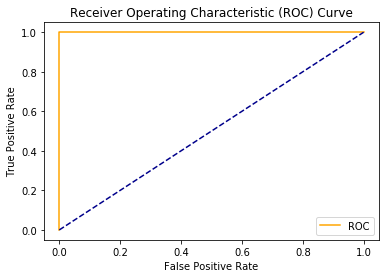

<IPython.core.display.Javascript object>

XGBCLASSIFIER(BASE_SCORE=0.5, BOOSTER=NONE, COLSAMPLE_BYLEVEL=1,
              COLSAMPLE_BYNODE=1, COLSAMPLE_BYTREE=1, GAMMA=0, GPU_ID=-1,
              IMPORTANCE_TYPE='GAIN', INTERACTION_CONSTRAINTS=NONE,
              LEARNING_RATE=0.300000012, MAX_DELTA_STEP=0, MAX_DEPTH=6,
              MIN_CHILD_WEIGHT=1, MISSING=NAN, MONOTONE_CONSTRAINTS=NONE,
              N_ESTIMATORS=100, N_JOBS=0, NUM_PARALLEL_TREE=1,
              OBJECTIVE='MULTI:SOFTPROB', RANDOM_STATE=0, REG_ALPHA=0,
              REG_LAMBDA=1, SCALE_POS_WEIGHT=NONE, SUBSAMPLE=1,
              TREE_METHOD=NONE, VALIDATE_PARAMETERS=FALSE, VERBOSITY=NONE)

classification report:                  precision    recall  f1-score   support

           0       0.89      0.91      0.90       500
           1       1.00      1.00      1.00       489
           2       0.94      0.88      0.91       519
           3       1.00      1.00      1.00       492
           4       0.86      0.89      0.88       515
           5       1.0

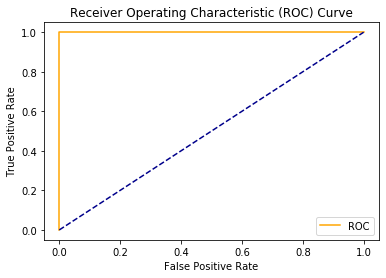

<IPython.core.display.Javascript object>

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.838778,0.583594,0.403423,0.547572,0.583594,0.583594,"[[173, 1, 43, 1, 37, 1, 7, 0, 6], [0, 0, 0, 0,...",0.516560
3,base,"XGBClassifier(base_score=0.5, booster=None, co...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481
4,oversampli,LogisticRegression(multi_class='ovr'),0.983056,0.874049,0.858292,0.872532,0.874049,0.874049,"[[439, 0, 41, 0, 33, 0, 9, 0, 10], [0, 489, 0,...",0.872941
5,oversampli,MultinomialNB(),0.980394,0.850559,0.831941,0.855991,0.850559,0.850559,"[[394, 0, 32, 0, 21, 0, 4, 0, 8], [6, 489, 0, ...",0.848594
6,oversampli,RandomForestClassifier(),0.994903,0.939150,0.931532,0.941763,0.939150,0.939150,"[[490, 0, 0, 0, 3, 0, 6, 0, 7], [0, 489, 0, 0,...",0.939662
7,oversampli,"XGBClassifier(base_score=0.5, booster=None, co...",0.990228,0.906040,0.894287,0.905819,0.906040,0.906040,"[[454, 0, 12, 0, 19, 0, 6, 0, 9], [0, 489, 0, ...",0.905791


In [76]:
func('oversampling')

In [77]:
result_tab

,Model_name,Model,AUC Score,Accuracy Score,Kappa Score,Precision Score,Recall Score,accuracy_score,confusion matrix,f1-score
0,base,LogisticRegression(multi_class='ovr'),0.859758,0.601562,0.436558,0.547408,0.601562,0.601562,"[[172, 1, 44, 1, 39, 0, 11, 0, 4], [0, 0, 0, 0...",0.547774
1,base,MultinomialNB(),0.818258,0.533594,0.309251,0.416022,0.533594,0.533594,"[[112, 1, 18, 1, 18, 0, 4, 0, 1], [0, 0, 0, 0,...",0.454761
2,base,RandomForestClassifier(),0.838778,0.583594,0.403423,0.547572,0.583594,0.583594,"[[173, 1, 43, 1, 37, 1, 7, 0, 6], [0, 0, 0, 0,...",0.516560
3,base,"XGBClassifier(base_score=0.5, booster=None, co...",0.839495,0.579688,0.414214,0.539141,0.579688,0.579688,"[[153, 1, 43, 0, 26, 1, 9, 0, 6], [0, 0, 0, 0,...",0.548481
4,oversampli,LogisticRegression(multi_class='ovr'),0.983056,0.874049,0.858292,0.872532,0.874049,0.874049,"[[439, 0, 41, 0, 33, 0, 9, 0, 10], [0, 489, 0,...",0.872941
5,oversampli,MultinomialNB(),0.980394,0.850559,0.831941,0.855991,0.850559,0.850559,"[[394, 0, 32, 0, 21, 0, 4, 0, 8], [6, 489, 0, ...",0.848594
6,oversampli,RandomForestClassifier(),0.994903,0.939150,0.931532,0.941763,0.939150,0.939150,"[[490, 0, 0, 0, 3, 0, 6, 0, 7], [0, 489, 0, 0,...",0.939662
7,oversampli,"XGBClassifier(base_score=0.5, booster=None, co...",0.990228,0.906040,0.894287,0.905819,0.906040,0.906040,"[[454, 0, 12, 0, 19, 0, 6, 0, 9], [0, 489, 0, ...",0.905791


## Comment:
+ we can conclude that "RandomForestClassifier" gave best accuracy score and f1 score compared to other models.

# TEST

In [78]:
# loading data
test = pd.read_excel('Foodie_Community_Test.xlsx')

<IPython.core.display.Javascript object>

In [79]:
test.head()

,Restaurant_Name,Reviewer_Name,Review_Text,Reviews & Followers,Time,Pictures_uploaded
0,Mustang Terrace Lounge,Sirisha Kandula,Could be one of the best place in gachibowli.\...,"1 Review , 1 Follower",2019-05-06 20:34:00,0
1,Shanghai Chef 2,Susmita Basu,I loved the food. Authentic Chinese and nice a...,"17 Reviews , 48 Followers",2018-08-18 15:43:00,4
2,Eat India Company,Ananth Popuri,I love this place in Gachibowli. I have been h...,"12 Reviews , 4 Followers",2019-03-09 15:37:00,0
3,Sardarji's Chaats & More,RAHUL DEY,"Too bad service, does not accept the Order mul...","5 Reviews , 999 Followers",2018-12-07 21:38:00,0
4,Cream Stone,Kiran,ordered nuts overloaded ice cream.fantastic ta...,"11 Reviews , 1 Follower",2018-11-24 13:40:00,0


In [80]:
for i in test['Review_Text']:
    print(i)

Could be one of the best place in gachibowli.
An underrated place. From here you can see the skyline of gachibowli.an awesome place.
Service is good. Value for money
I loved the food. Authentic Chinese and nice ambience. Taste was really good. Had rice noodles after a long time and it was pretty good. The lamb and dragon prawns are must try.
I love this place in Gachibowli. I have been here several times now and the quality of food is amazing and the staff are good.

I highly recommend this place and just above this we have tiki shack.
Too bad service, does not accept the Order multiple times & does not receive Calls too. And the best part, they cancel the Orders after money gets deducted. Very bad experience, I mean WORST Experience.
ordered nuts overloaded ice cream.fantastic taste.
They always deny the table on weekends or Friday even though we book on Zomato or other apps due to high demand, this is not fair if we did a pre booking
good
I ordered Afghani chicken from here but I got

This is a quite happening place with good food and perfect ambience order tawa fish fry and chicken tikka and pasta verry good service all so very good thanks Roshan coming agen
Amazing food with quick service . Feeling hungry and wish to spend reasonably? Yes this is the place you must try out then. The enticing food once tried you won’t resist to order again.
Not many varieties available. Taste not that good.
Ambience not good too. Don't understand why people have rated it so high on zomato. Went for team lunch, it was complete waste of money. Everyone was so unhappy that we made this decision.
The food and drinks are good.
The ambience is great too.
But the place feels too crowded and the dance floor sucks.
The DJ music is alright.
The staff is not good and need to be given proper training.
The way they rush guests out after 12 is too bad.
Shwarma was really good. Biryani was average with hard huge chicken pieces. Paneer dish was also average. They have seating for everyone from bac

In [81]:
# checking null values
test.isnull().sum()

Restaurant_Name        0
Reviewer_Name          0
Review_Text            1
Reviews & Followers    0
Time                   0
Pictures_uploaded      0
dtype: int64

In [82]:
# replace null values with its mode
test['Review_Text'].fillna(test['Review_Text'].mode()[0], inplace = True)

In [83]:
# data preprocessing
test['sentence_lower'] = test["Review_Text"].str.lower()
test['sentence_no_punctuation'] = test['sentence_lower'].str.replace('[^\w\s]','')
test['sentence_no_punctuation'] = test["sentence_no_punctuation"].fillna("fillna")

<IPython.core.display.Javascript object>

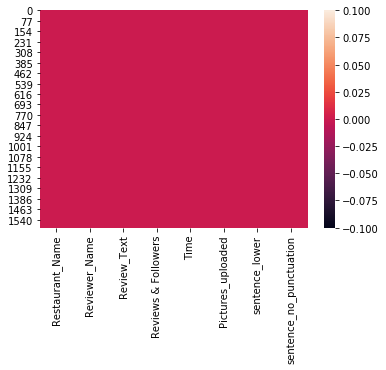

In [84]:
# visualising the null values
sns.heatmap(test.isnull())# we can observe that there is no null values

In [85]:
# Initialize empty array 
# to append clean text  
corpus1 = []
for i in range(0, len(test)):
    review1 = test['sentence_no_punctuation'][i]
    review1 = review1.lower()
    review1 = review1.split()
    review1 = [ps.stem(word) for word in review1 if not word in stopwords.words('english')]
    review1 = ' '.join(review1)
    corpus1.append(review1)

In [86]:
test['sentence_no_punctuation']

0       could be one of the best place in gachibowli\n...
1       i loved the food authentic chinese and nice am...
2       i love this place in gachibowli i have been he...
3       too bad service does not accept the order mult...
4        ordered nuts overloaded ice creamfantastic taste
                              ...                        
1595    amazing food anyone who wants to have deliciou...
1596    driven cafe comes with a perfect ambience that...
1597                                                ok ok
1598                                                 good
1599    it was an awesome experiencethe staff speciall...
Name: sentence_no_punctuation, Length: 1600, dtype: object

# USING RANDOM FOREST CLASSIFIER TO PREDICT THE RATING

In [87]:
# Best model
best = RandomForestClassifier()
best.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
# prediction
y_pred = best.predict(x_test)

In [89]:
y_pred

array([4, 7, 6, ..., 2, 6, 5], dtype=int64)

In [90]:
#accuracy score
accuracy_score(y_test,y_pred)

0.9398210290827741

In [91]:
#f1 score
f1_score(y_test,y_pred, average = 'weighted')

0.9402880543310462

In [92]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[489,   0,   2,   0,   2,   0,   3,   0,  15],
       [  0, 489,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 473,   0,   3,   0,   0,   0,  11],
       [  0,   0,   0, 491,   0,   0,   0,   0,   0],
       [  4,   0,   2,   0, 494,   0,  13,   0,  17],
       [  0,   0,   0,   0,   0, 486,   0,   0,   0],
       [  6,   0,   2,   0,   8,   0, 350,   0, 107],
       [  0,   0,   0,   0,   0,   0,   0, 498,   0],
       [ 10,   0,   2,   0,   1,   0,  61,   0, 431]], dtype=int64)

In [93]:
#classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       511
           1       1.00      1.00      1.00       489
           2       0.98      0.97      0.98       487
           3       1.00      1.00      1.00       491
           4       0.97      0.93      0.95       530
           5       1.00      1.00      1.00       486
           6       0.82      0.74      0.78       473
           7       1.00      1.00      1.00       498
           8       0.74      0.85      0.79       505

    accuracy                           0.94      4470
   macro avg       0.94      0.94      0.94      4470
weighted avg       0.94      0.94      0.94      4470



In [94]:
test['Review_Text']

0       Could be one of the best place in gachibowli.\...
1       I loved the food. Authentic Chinese and nice a...
2       I love this place in Gachibowli. I have been h...
3       Too bad service, does not accept the Order mul...
4       ordered nuts overloaded ice cream.fantastic ta...
                              ...                        
1595    Amazing food.... Anyone who wants to have deli...
1596    Driven cafe comes with a perfect ambience that...
1597                                                Ok ok
1598                                                 good
1599    it was an awesome experience.....the staff spe...
Name: Review_Text, Length: 1600, dtype: object

In [95]:
# function to predict the rating
def check(msg):
    v = cv.transform([msg])
    prec = best.predict(v)
    return prec

In [96]:
# took 1 sample for testing
check('could be one of the best place in gachibowli\nan underrated place from here you can see the skyline of gachibowlian awesome place\nservice is good value for money')

array([6], dtype=int64)

In [97]:
# predicting rating for all review text in test dataset
pred_text = []
for i in test['sentence_no_punctuation']:
    pred_text.append(check(i))

In [98]:
df_pred_text = pd.DataFrame(pred_text)

<IPython.core.display.Javascript object>

In [99]:
df_pred_text.columns = ['Pred']

In [100]:
# take inverse transform for converting the values to its actual form
df_pred_text['Pred'] = label_encoder.inverse_transform(df_pred_text['Pred'])

# CREATING DATAFRAME WITH REVIEW TEXT AND PREDICTED RATING

In [102]:
# creating dataframe with review and its rating
result=pd.concat([test['Review_Text'],df_pred_text['Pred']],axis=1)

<IPython.core.display.Javascript object>

In [103]:
result.head()

,Review_Text,Pred
0,Could be one of the best place in gachibowli.\...,4.0
1,I loved the food. Authentic Chinese and nice a...,5.0
2,I love this place in Gachibowli. I have been h...,5.0
3,"Too bad service, does not accept the Order mul...",1.0
4,ordered nuts overloaded ice cream.fantastic ta...,5.0


In [104]:
result.dtypes

Review_Text     object
Pred           float64
dtype: object

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

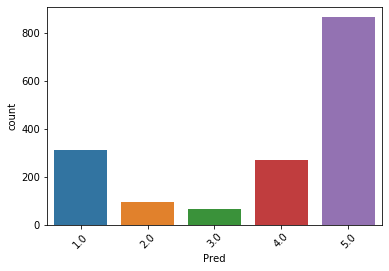

In [105]:
# visualising predicted ratings
pltt = sns.countplot(result['Pred'])
plt.xticks(rotation=45)

## Comment:
+ Test dataset contains mostly reviews belongs to rating '5.0'

In [108]:
result['Pred'].unique()

array([4., 5., 1., 2., 3.])

# EXPORTING AS CSV

In [109]:
# export the result to csv
report_to_csv=result.to_csv('C:\\Users\\sowndariya\\Desktop\\PGAA Capstone Projects-20210205T113733Z-001\\PGAA Capstone Projects\\NLP\\Dataset\\predicted_ratings.csv')